In [1]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
def plot_img(img, f_size=(10,10)):
    plt.figure(figsize=f_size)
    plt.imshow(img)
    
PATH = './images/task_5/'

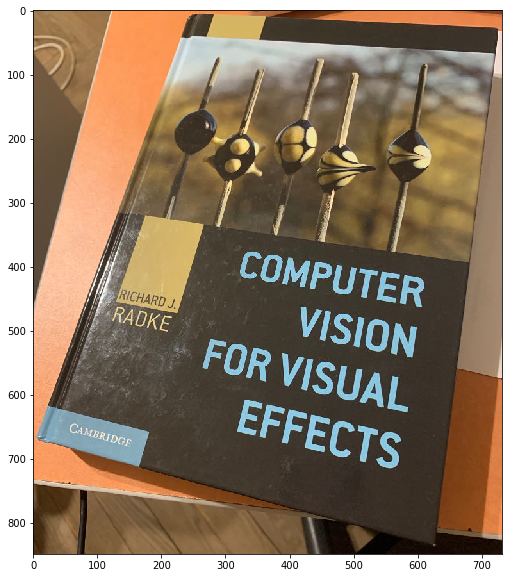

In [4]:
img = mpimg.imread(PATH + 'image_1.jpg')

plot_img(img)

In [5]:
def getPerspectiveTransform(pts1,pts2):

    A = np.array([
        [ pts1[0][0], pts1[0][1], 1, 0, 0, 0, 0, 0, 0, -pts2[0][0], 0, 0, 0 ],
        [ 0, 0, 0, pts1[0][0], pts1[0][1], 1, 0, 0, 0, -pts2[0][1], 0, 0, 0 ],
        [ 0, 0, 0, 0, 0, 0, pts1[0][0], pts1[0][1], 1, -1, 0, 0, 0 ],

        [ pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, 0, 0, 0, -pts2[1][0], 0, 0 ],
        [ 0, 0, 0, pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, -pts2[1][1], 0, 0 ],
        [ 0, 0, 0, 0, 0, 0, pts1[1][0], pts1[0][1], 1, 0, -1, 0, 0 ],

        [ pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, -pts2[2][0], 0 ],
        [ 0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, -pts2[2][1], 0 ],
        [ 0, 0, 0, 0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, -1, 0],

        [ pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -pts2[3][0] ],
        [ 0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, -pts2[3][1] ],
        [ 0, 0, 0, 0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, -1],

        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0 ]
    ])

    y = np.array([
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1
    ])

    x = np.dot(np.linalg.inv(A), y)

    M = np.array([
        [ x[0], x[1], x[2] ],
        [ x[3], x[4], x[5] ],
        [ x[6], x[7], x[8] ]
    ])/x[8]

    return M

In [6]:
(r,c) = img.shape[:2]

pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])

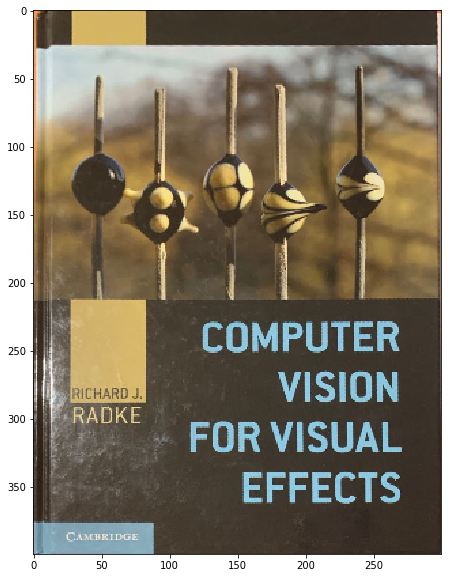

In [8]:
M = getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img, M, (300, 400))

plot_img(dst)